## Objetivos
1. Explorar las características principales del conjunto de datos.
2. Identificar patrones y correlaciones entre variables clave.
3. Limpiar los datos para su análisis.
4. Presentar hallazgos que expliquen factores que influyen en los precios.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('spain_energy_market.csv')
dfcopy = df.copy()
dfcopy['datetime'] = pd.to_datetime(dfcopy['datetime'])
print(dfcopy.info())
print(dfcopy.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  40212 non-null  datetime64[ns]
 1   id        40212 non-null  int64         
 2   name      34734 non-null  object        
 3   geoid     10956 non-null  float64       
 4   geoname   10956 non-null  object        
 5   value     40212 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 1.8+ MB
None
                            datetime            id         geoid         value
count                          40212  40212.000000  10956.000000  4.021200e+04
mean   2016-07-08 00:06:47.878245376   2767.757286      2.000000  1.325967e+05
min              2014-01-01 23:00:00      3.000000      1.000000 -1.426133e+06
25%              2015-04-09 22:00:00    600.000000      1.000000  5.112708e+01
50%              2016-07-08 22:00:00    602

Estamos realizando un exploracion de los datos que nos esta otorgando nuestra base de datos del consumo del mercado electrico de en varias regiones. Pude observar particularidades en los datos registrados.

In [ ]:
print(dfcopy.head(3))
print(dfcopy.isnull().sum())

             datetime   id                            name  geoid geoname  \
0 2014-01-01 23:00:00  600  Precio mercado SPOT Diario ESP    3.0  España   
1 2014-01-02 23:00:00  600  Precio mercado SPOT Diario ESP    3.0  España   
2 2014-01-03 23:00:00  600  Precio mercado SPOT Diario ESP    3.0  España   

       value  
0  25.280833  
1  39.924167  
2   4.992083  
datetime        0
id              0
name         5478
geoid       29256
geoname     29256
value           0
dtype: int64


Pude observar que en los registros hay dos (2) identificadores unicos, lo cual podemos usarlo para agruparlos y ver que datos nos proporcionan.
Tambien podemos observar que hay muchos datos faltantes, debemos realizar una limpieza muy precisa, ya que son columnas bastantes importantes como lo son: geoid, geoname, name.

<Axes: >

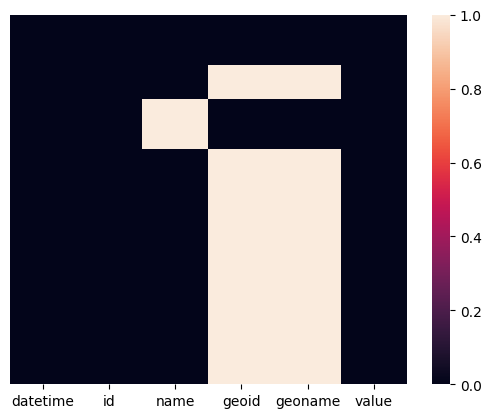

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(dfcopy.isna(), yticklabels=False, cbar=True)

En la siguiente visualizacion podemos apreciar la cantidad de registros nulos.

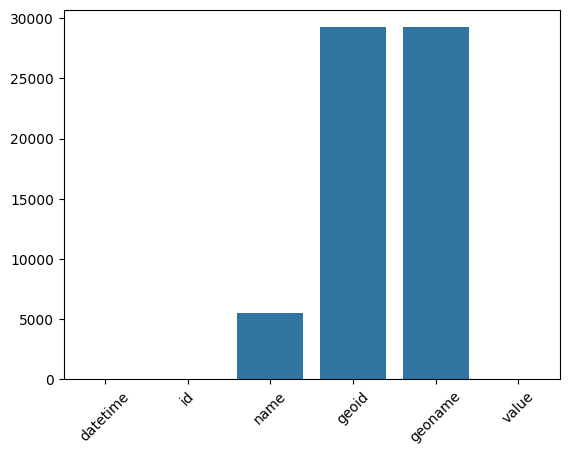

In [ ]:
sns.barplot(df.isna().sum())
plt.xticks(rotation=45)
plt.show()

In [ ]:
## Buscaremos rellenar los datos faltantes con valores referenciales. ej: sin registro
for columna in df.columns:
  print(f"\nValores únicos en {columna}:")
  print(df[columna].unique())



Valores únicos en datetime:
['2014-01-01 23:00:00' '2014-01-02 23:00:00' '2014-01-03 23:00:00' ...
 '2018-12-29 23:00:00' '2018-12-30 23:00:00' '2018-12-31 23:00:00']

Valores únicos en id:
[  600   602  1334  1118  1120  1117  1119  1293 10141 10258 10073     9
 10167     4    17 10064    14     3]

Valores únicos en name:
['Precio mercado SPOT Diario ESP' 'Precio mercado SPOT Diario FRA'
 'Precio mercado SPOT Diario POR'
 'Energía asignada en Mercado SPOT Diario España'
 'Energía asignada en Mercado SPOT Diario Francia' nan
 'Rentas de congestión mecanismos implícitos diario Francia exportación'
 'Rentas de congestión mecanismos implícitos diario Portugal exportación'
 'Rentas de congestión mecanismos implícitos diario Francia importación'
 'Rentas de congestión mecanismos implícitos diario Portugal importación'
 'Demanda real' 'Demanda programada PBF total'
 'Generación programada PBF total' 'Generación programada PBF Eólica'
 'Generación programada PBF Ciclo combinado'
 'Generació

In [ ]:
print(df["geoname"].value_counts())

print(df["name"].value_counts())

print(df["geoid"].value_counts())

geoname
España      3652
Francia     3652
Portugal    3652
Name: count, dtype: int64
name
Precio mercado SPOT Diario ESP                                            1826
Precio mercado SPOT Diario POR                                            1826
Energía asignada en Mercado SPOT Diario España                            1826
Energía asignada en Mercado SPOT Diario Francia                           1826
Generación programada PBF Solar fotovoltaica                              1826
Generación programada PBF UGH + no UGH                                    1826
Generación programada PBF Gas Natural Cogeneración                        1826
Precio mercado SPOT Diario FRA                                            1826
Generación programada PBF total                                           1825
Generación programada PBF Nuclear                                         1825
Generación programada PBF Eólica                                          1825
Demanda programada PBF total             

In [ ]:
print(df["geoname"].isnull().sum())

print(df["name"].isnull().sum())

print(df["geoid"].isnull().sum())

29256
5478
29256


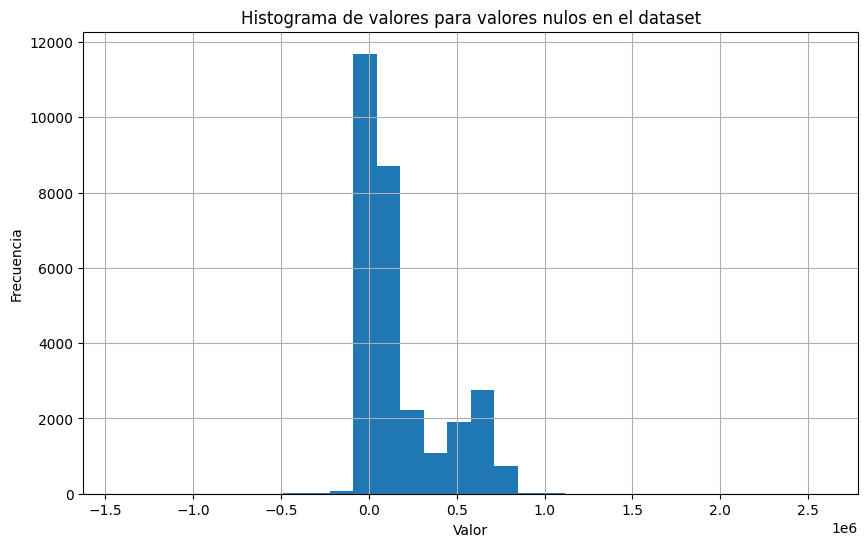

In [ ]:

resumen_nulos = dfcopy[dfcopy['geoname'].isnull()]
resumen_nulos["value"].hist(bins=30, figsize=(10, 6))
plt.title("Histograma de valores para valores nulos en el dataset")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

## Realizaremos una vizualizacion de la demanda de energia electrica.

id
3        Axes(0.125,0.11;0.775x0.77)
4        Axes(0.125,0.11;0.775x0.77)
9        Axes(0.125,0.11;0.775x0.77)
14       Axes(0.125,0.11;0.775x0.77)
17       Axes(0.125,0.11;0.775x0.77)
600      Axes(0.125,0.11;0.775x0.77)
602      Axes(0.125,0.11;0.775x0.77)
1117     Axes(0.125,0.11;0.775x0.77)
1118     Axes(0.125,0.11;0.775x0.77)
1119     Axes(0.125,0.11;0.775x0.77)
1120     Axes(0.125,0.11;0.775x0.77)
1293     Axes(0.125,0.11;0.775x0.77)
1334     Axes(0.125,0.11;0.775x0.77)
10064    Axes(0.125,0.11;0.775x0.77)
10073    Axes(0.125,0.11;0.775x0.77)
10141    Axes(0.125,0.11;0.775x0.77)
10167    Axes(0.125,0.11;0.775x0.77)
10258    Axes(0.125,0.11;0.775x0.77)
Name: value, dtype: object


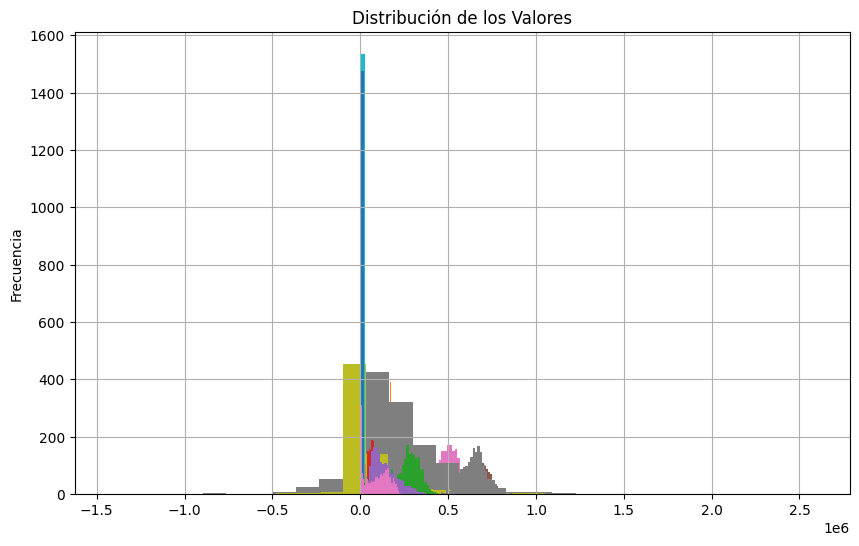

In [ ]:
# Histograma de valores
data = dfcopy.groupby("id")["value"].hist(bins=30, figsize=(10, 6))
print(data)
plt.title("Distribución de los Valores")
plt.ylabel("Frecuencia")
plt.show()

En el siguiente grafico podemos apreciar el historigrama de los valores agrupados por nombre geografico, en el grafico no se puede apreciar los datos nulos

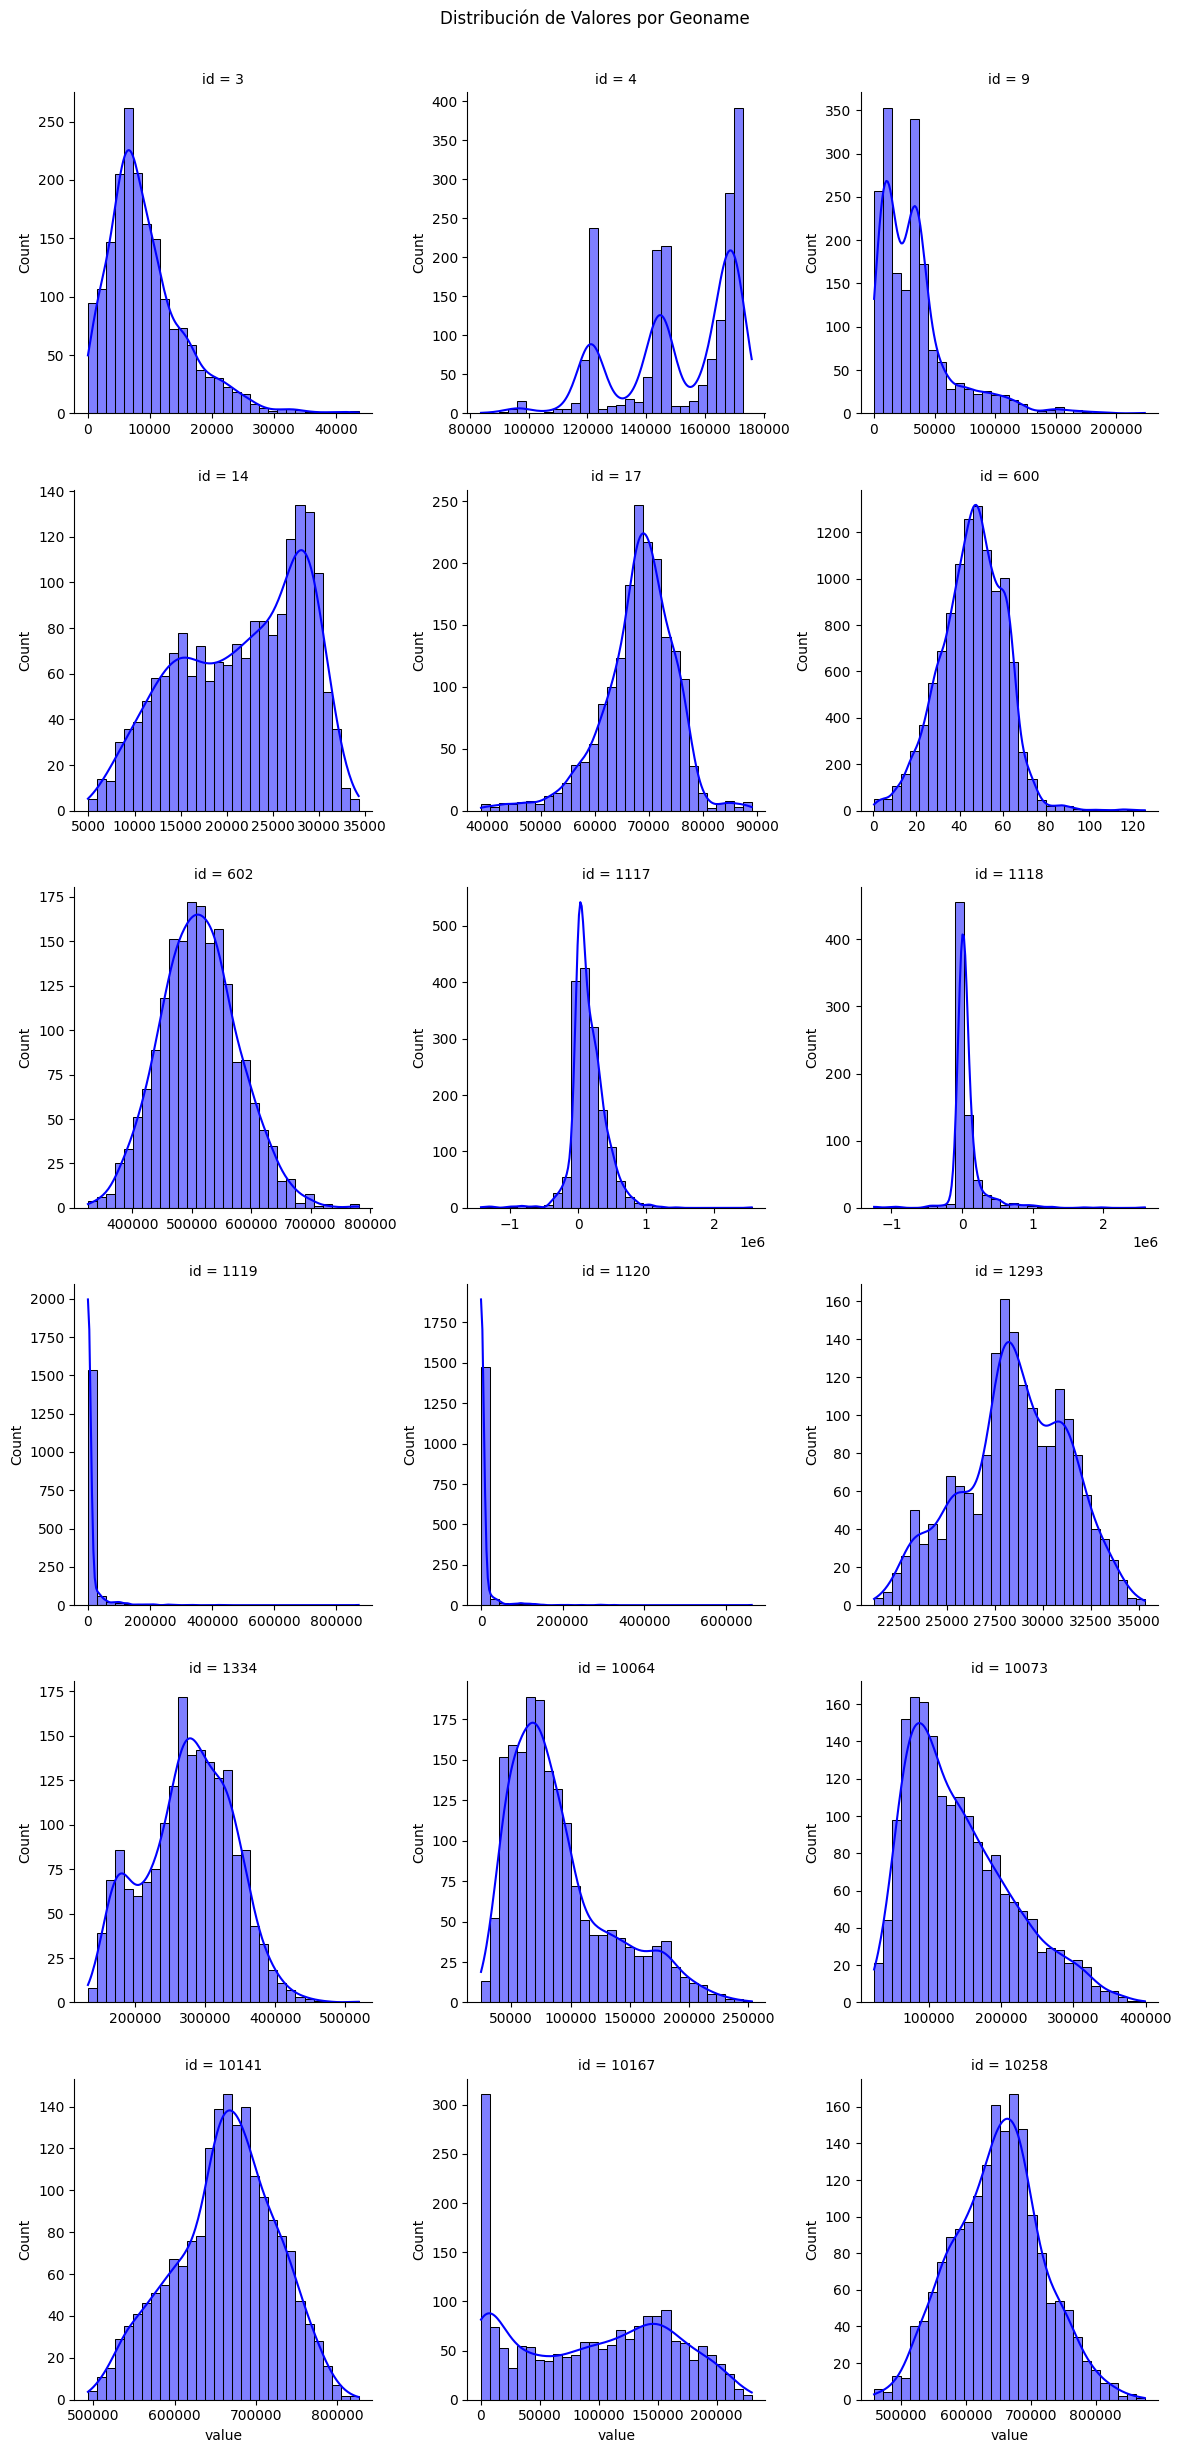

In [ ]:
top_geonames = dfcopy['id'].value_counts().index
filtered_data = dfcopy[dfcopy['id'].isin(top_geonames)]

# Crear histogramas segmentados
g = sns.FacetGrid(filtered_data, col="id", col_wrap=3, height=4, sharex=False, sharey=False)
g.map(sns.histplot, "value", bins=30, kde=True, color="blue")

# Títulos y ajuste de diseño
g.fig.suptitle("Distribución de Valores por Geoname", y=1.02)
plt.show()

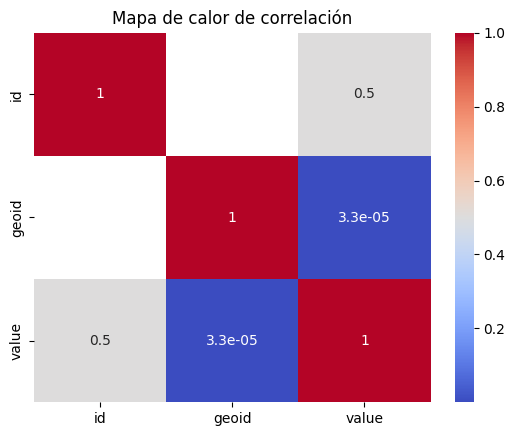

In [ ]:
numeric_data = dfcopy.select_dtypes(include=['float64', 'int64'])
correlation = numeric_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación')
plt.show()

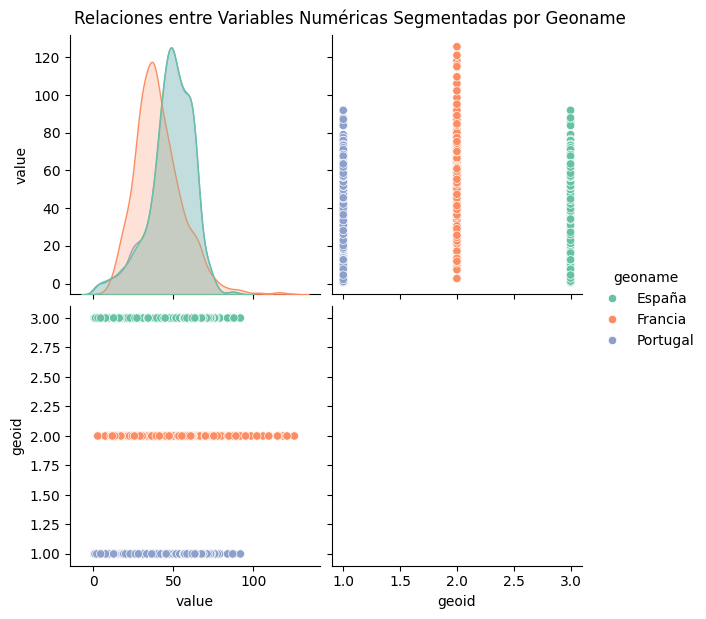

In [ ]:
# Pairplot para explorar relaciones entre variables numéricas
sns.pairplot(dfcopy, vars=["value", "geoid"], hue="geoname", palette="Set2", height=3)
plt.suptitle("Relaciones entre Variables Numéricas Segmentadas por Geoname", y=1.02)
plt.show()

<Axes: title={'center': 'Consumo de energía en MW'}, xlabel='date'>

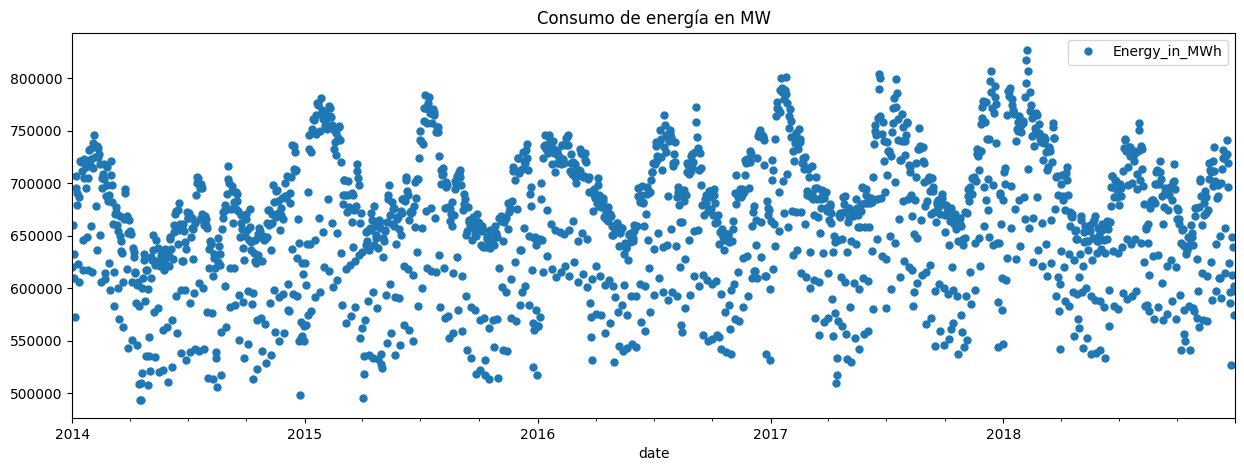

In [ ]:
df_programada = dfcopy[dfcopy['name']== 'Demanda programada PBF total'].copy()
df_programada["date"] = dfcopy["datetime"].dt.date
df_programada.set_index("date", inplace=True)
df_programada = df_programada[["value"]]
df_programada = df_programada.asfreq("D")
df_programada = df_programada.rename(columns={"value": "Energy_in_MWh"})
df_programada.head()
df_programada.plot(style= '.', figsize= (15,5), ms=10, title='Consumo de energía en MW')

            Energy_in_MWh
date                     
2014-01-01   28191.597222
2014-01-02   28465.180556
2014-01-03   26860.493056
2014-01-04   25333.597222
2014-01-05   23905.541667


<Axes: title={'center': 'Demanda real en MW'}, xlabel='date'>

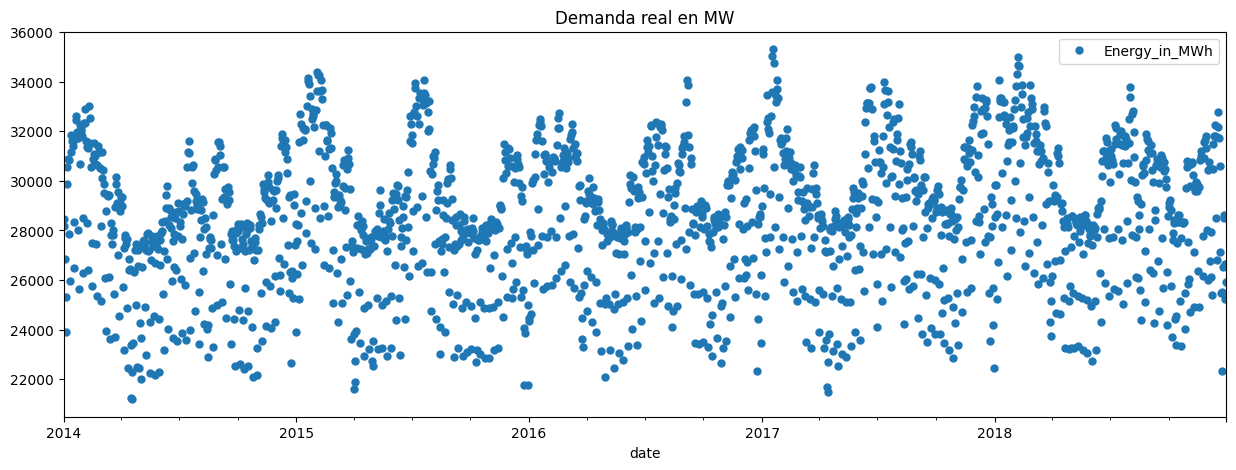

In [ ]:
df_demanda = dfcopy[dfcopy['name']== 'Demanda real'].copy()
df_demanda["date"] = dfcopy["datetime"].dt.date
df_demanda.set_index("date", inplace=True)
df_demanda = df_demanda[["value"]]
df_demanda = df_demanda.asfreq("D")
df_demanda = df_demanda.rename(columns={"value": "Energy_in_MWh"})
print(df_demanda.head())
df_demanda.plot(style= '.', figsize= (15,5), ms=10, title='Demanda real en MW')

## Coclusion de las imagenes:

  Podemos observar que la demanda real y el consumo de energia presentan el mismo patron, por lo cual podemos asumir que la energia que se produce, el consumidor final la esta utilizando.

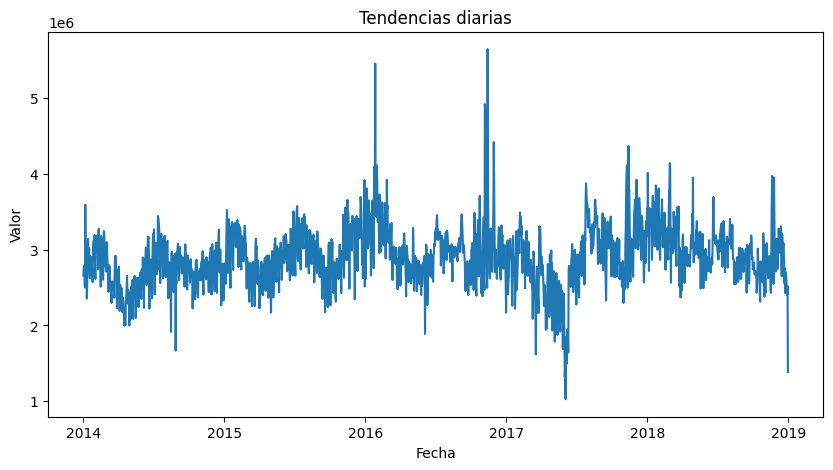

In [ ]:
dfcopy['date'] = dfcopy['datetime'].dt.date
daily_data = dfcopy.groupby('date')['value'].sum()
daily_data.plot(figsize=(10, 5), title='Tendencias diarias', xlabel='Fecha', ylabel='Valor')
plt.show()